In [2]:
### Link to Github Repo with the same code: ###
### https://github.com/dylan-losey/me5824.git ###

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, LinearConstraint, NonlinearConstraint

In [3]:
### Create a class to perform the trajectory optimization ###

class TrajOpt(object):

    def __init__(self):

        # initialize trajectory
        self.n_waypoints = 10
        self.n_dof = 2
        self.home = np.array([0., 0.])
        self.xi0 = np.zeros((self.n_waypoints, self.n_dof))
        self.xi0 = self.xi0.reshape(-1)

        # create start constraint and action constraint
        self.B = np.zeros((self.n_dof, self.n_dof * self.n_waypoints))
        for idx in range(self.n_dof):
            self.B[idx,idx] = 1
        self.lincon = LinearConstraint(self.B, self.home, self.home)
        self.nonlincon = NonlinearConstraint(self.nl_function, -1.0, 1.0)

    # each action cannot move more than 1 unit
    def nl_function(self, xi):
        xi = xi.reshape(self.n_waypoints, self.n_dof)
        actions = xi[1:, :] - xi[:-1, :]
        return np.linalg.norm(actions, axis=1)

    # trajectory cost function
    def trajcost(self, xi):
        xi = xi.reshape(self.n_waypoints, self.n_dof)
        cost = 0
        ### define your cost function here ###
        ### here is an example encouraging the robot to reach [5, 2] ###
        for idx in range(self.n_waypoints):
            cost += np.linalg.norm(np.array([5., 2.]) - xi[idx, :])
        return cost

    # run the optimizer
    def optimize(self):
        res = minimize(self.trajcost, self.xi0, method='SLSQP', constraints={self.lincon, self.nonlincon}, options={'eps': 1e-3, 'maxiter': 1000})
        xi = res.x.reshape(self.n_waypoints, self.n_dof)
        return xi, res

[[0.         0.        ]
 [0.93047681 0.37062881]
 [1.8603355  0.74060121]
 [2.78934118 1.11310417]
 [3.71979234 1.48966302]
 [4.64996961 1.85928039]
 [4.99970809 1.99951632]
 [4.99962738 1.99975612]
 [4.99971956 1.99928648]
 [4.99958895 1.99981005]]


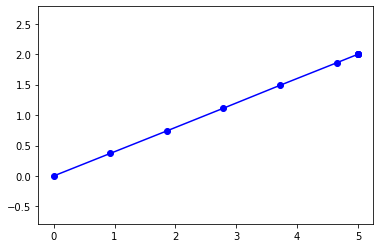

In [4]:
### Run the trajectory optimizer ###

trajopt = TrajOpt()
xi, res = trajopt.optimize()
print(xi)
plt.plot(xi[:,0], xi[:,1], 'bo-')
plt.axis("equal")
plt.show()